In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
np.random.seed(42)

data = {
    'Gender': np.random.choice(['Male','Female'], 50),
    'SeniorCitizen': np.random.choice([0,1], 50),
    'Tenure': np.random.randint(1, 72, 50),
    'MonthlyCharges': np.random.randint(20, 120, 50),
    'TotalCharges': np.random.randint(100, 8000, 50),
    'Churn': np.random.choice(['Yes','No'], 50, p=[0.3, 0.7])
}

df = pd.DataFrame(data)
print("Sample of Big Dataset (50 rows):")
display(df.head())

Sample of Big Dataset (50 rows):


,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn
0,Male,0,63,98,3848,Yes
1,Female,1,18,34,7492,No
2,Male,0,44,109,5453,No
3,Male,1,34,61,4879,No
4,Male,0,62,96,763,No


In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Churn'] = le.fit_transform(df['Churn'])   # 1 = Yes, 0 = No

X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.6


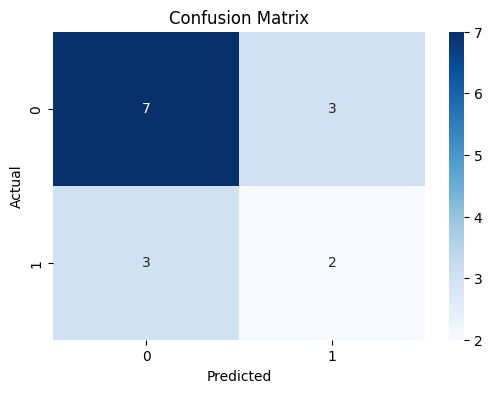

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


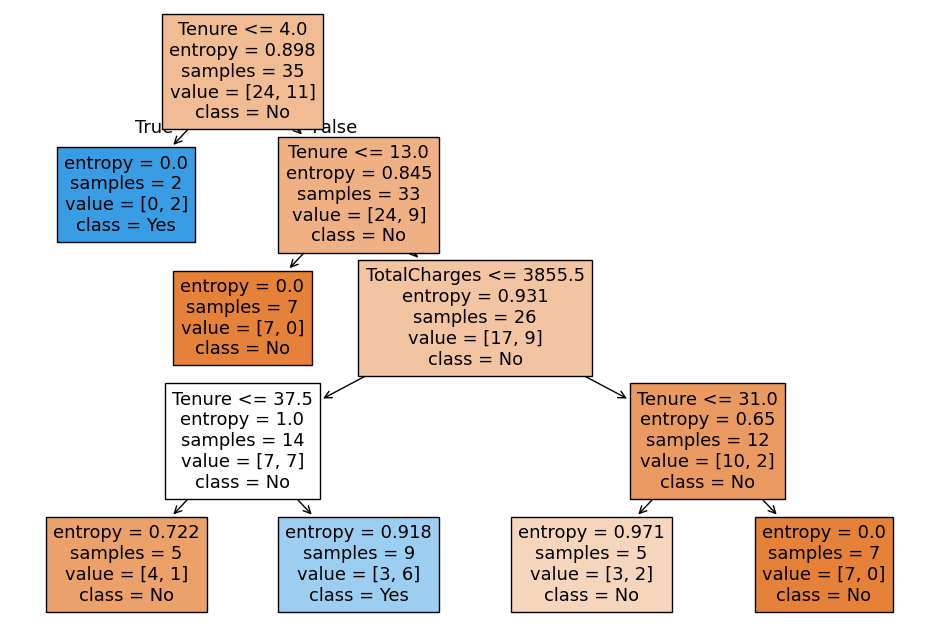

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()
